# 01. Prepare Problem

A loan leanding company works by analyzing the finantial history of the customers & choose if they are risky for loan or not.

Data for such customer may be from -
* Inhouse database - authenticity is already established
* Partner OR
* Peer-2-Peer market place

When a company receive data from last 2 places, they need to verify the authenticity of data by asking customer to e-sign on their loan page.

Asking the customer to e-sign and then wait for a long duration may not be desirable by any P2P market place so this company want us to process data that they have received from market place to derive insights about how many users may enroll to their e-sign process.

## Question : 

Our goal is to process a sample of data that we had  receive from market place and was able to ask customer for signing. We are going to train our model from this data so that next onwards, we will directly derive insights on the number of customer that can e-sign our process.

We will classify the user in "Likely" and "Unlikely" category.

> ### 1.1 Load Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('D:\\data')

import pandas as pd
pd.set_option('display.max_columns',500)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pally as pal

> ### 1.2 Load Data

In [2]:
data = pd.read_csv('FinancialData.csv')

In [3]:
target = 'e_signed'

# 02. Exploratory Data Analysis

In [6]:
pal.eda.print_null_cntNpct([data])

Total Missing Features : 0.

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []


There is no missing feature in our data set

In [7]:
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


**Conclusion:**
* [Age] : Average age is 42(okay) and Max age is 96(quite suspicious)
* [home_owner] : 42% of data have home owners information
* [income] : income is in the range of 900 - 10000, with average being 3500
* [month_employed] : range is 0-11, with average on 1.1 (looks like the data in this is not quite good)
* [year_employed] : range is 0-16 with average of 3.5
* [current_address_year] : range is 0-12
* [has_dept] : 79% of users have already dept for an average amount of 950
* [risk_score_n] : these risk score are given by our financial and engineering department
* [ext_quality_score_n] : these are the scores that external vendor have given them
* [inquires_last_month] : range is 1-30 with average of 6
* [e-signed] : 49% of users have signed in. QUITE BALANCED DATASET

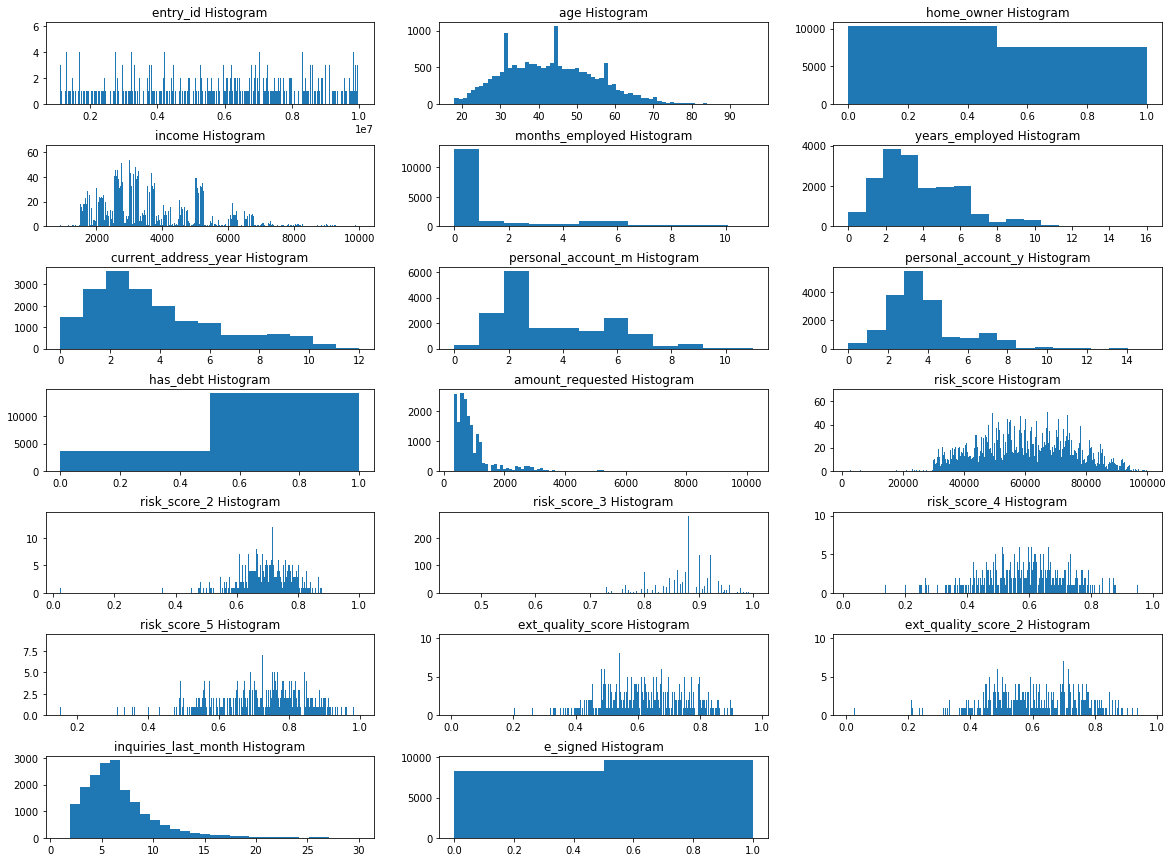

In [24]:
num_feature = data.select_dtypes(exclude='object').columns.tolist()
plt.rcParams['figure.figsize'] = (20,15)

counter = 1
for i in num_feature:
    plt.subplot(np.ceil(len(num_feature)/3), 3, counter)
    f = plt.gca()
    f.set_title(i+' Histogram')
    
    vals = data[i].nunique()
    
    plt.hist(data[i], bins=vals)
    plt.subplots_adjust(hspace=0.5)
    counter+=1

In [61]:
data.drop(columns=['e_signed','entry_id']).corrwith(data.e_signed).sort_values()

age                    -0.096998
personal_account_m     -0.081195
home_owner             -0.047409
risk_score_3           -0.037483
ext_quality_score      -0.032129
inquiries_last_month   -0.025165
ext_quality_score_2    -0.024271
personal_account_y     -0.024160
current_address_year   -0.018969
risk_score_5           -0.007541
years_employed          0.003748
risk_score_4            0.006147
months_employed         0.010128
risk_score_2            0.010473
income                  0.031377
has_debt                0.039192
amount_requested        0.069572
risk_score              0.086098
dtype: float64

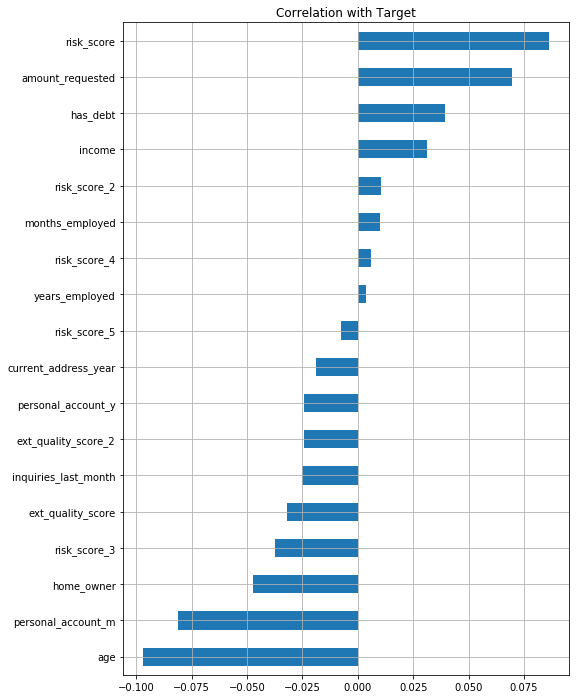

In [62]:
data.drop(columns=['e_signed','entry_id']).corrwith(data.e_signed).sort_values().plot.barh(figsize=(8,12),grid=True,title='Correlation with Target')

* NEGATIVE corr :  age > personal_account_m > home_owner > risk_score_3 > external_quality_score
* POSITIVE corr : risk_score > amount_requested > has_debt > income

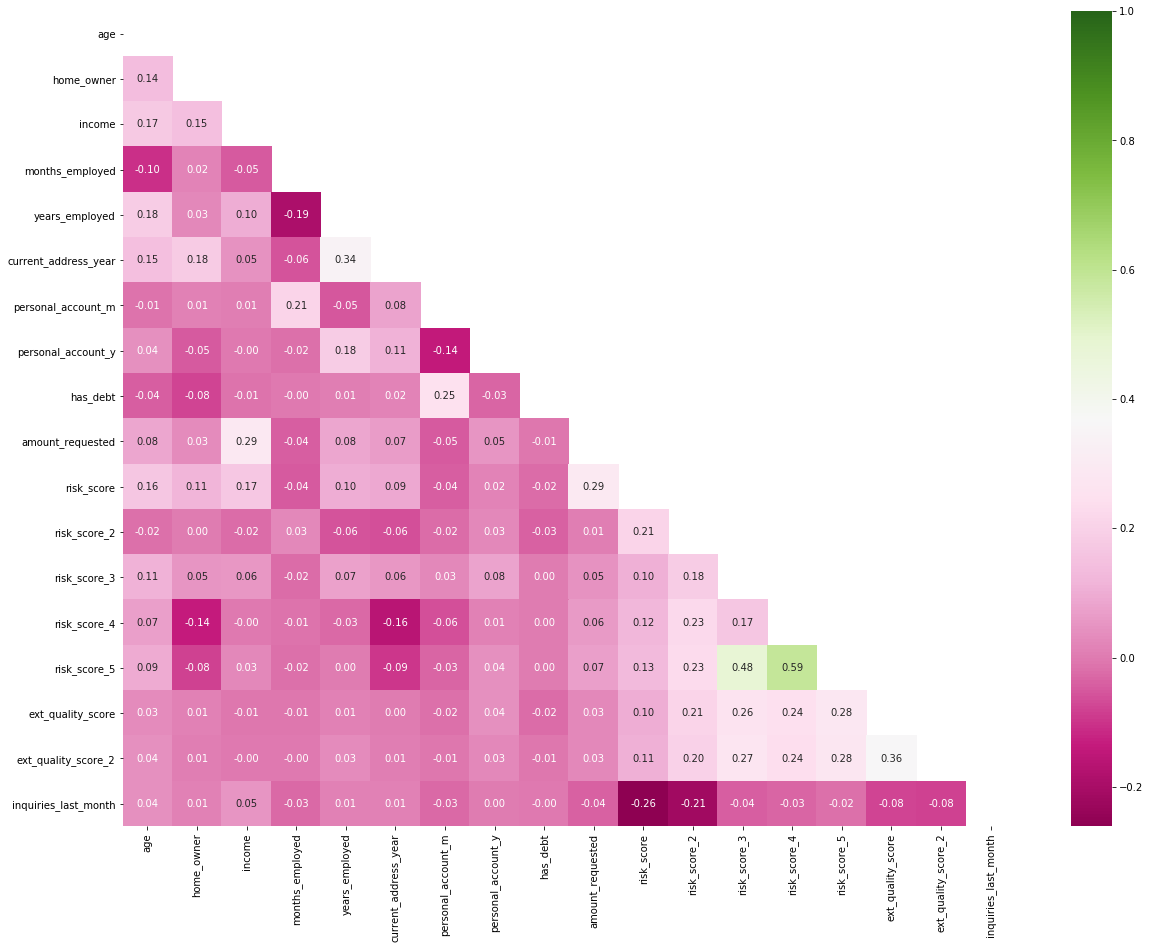

In [57]:
corr = data.drop(columns=['e_signed','entry_id']).corr()
sns.heatmap(corr,mask=np.triu(np.ones_like(corr)),annot=True,fmt='.2f',cmap='PiYG')

risk_score_5 is 48% and 59% correleted with risk_score_3 and risk_score_4. If we really required, we can drop risk_score_5 feature

# 03. Prepare Data

> ### Data Cleaning and Imputation

In [58]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [63]:
pal.eda.print_null_cntNpct([data])

Total Missing Features : 0.

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []


**No cleaning required**

> ### 3.2 Cardinality and Rare value reduction

In [65]:
data.select_dtypes(include='object').head()

,pay_schedule
0,bi-weekly
1,weekly
2,weekly
3,bi-weekly
4,semi-monthly


**pay_schedule is only the categorical variable that we need to encode before training**
1. k-1 & k OneHot
2. Target Guided

> ### 3.3 Feature Engineering

In [4]:
#Lets combing the year and month to month
data['personal_account_months'] = data['personal_account_m']+ data['personal_account_y']*12

In [8]:
data['employment_months'] = data['months_employed']+ data['years_employed']*12

In [9]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,employment_months
0,7629673,40,bi-weekly,1,3135,36,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30,72
1,3560428,61,weekly,0,3180,72,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86,144
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19,6
3,5682812,40,bi-weekly,0,5230,72,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86,144
4,5335819,33,semi-monthly,0,3590,60,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98,120


In [10]:
# drop original columns
for i in ['personal_account_m','personal_account_y','months_employed','years_employed']:
    del data[i]

In [13]:
num_feature = data.drop(columns=['entry_id','pay_schedule']).columns.tolist()

 1 . age  ( Correlation : -0.097 )


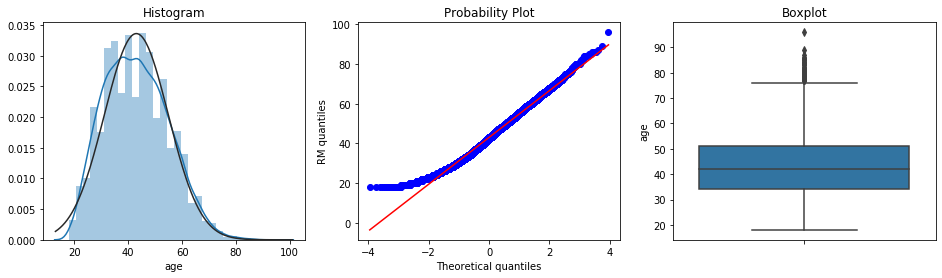

 2 . home_owner  ( Correlation : -0.0474 )


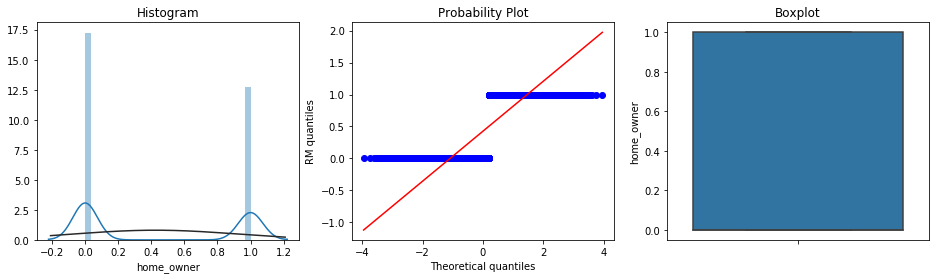

 3 . income  ( Correlation : 0.0314 )


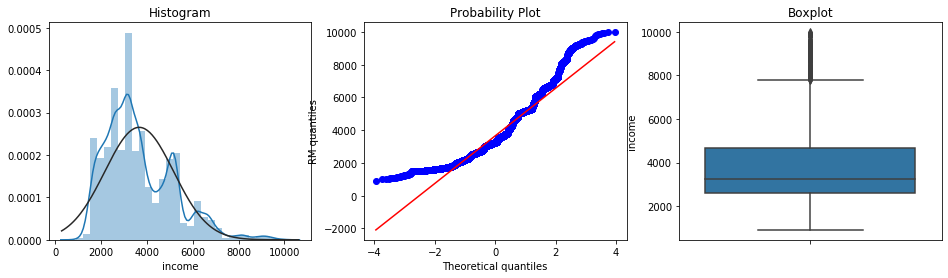

 4 . current_address_year  ( Correlation : -0.019 )


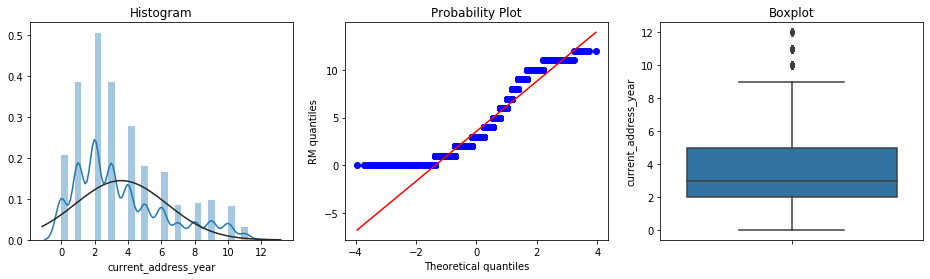

 5 . has_debt  ( Correlation : 0.0392 )


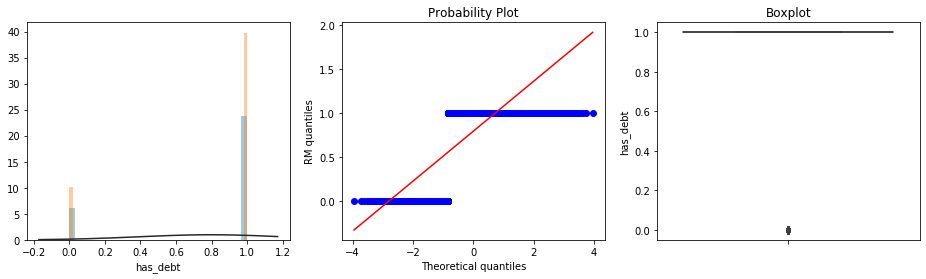

 6 . amount_requested  ( Correlation : 0.0696 )


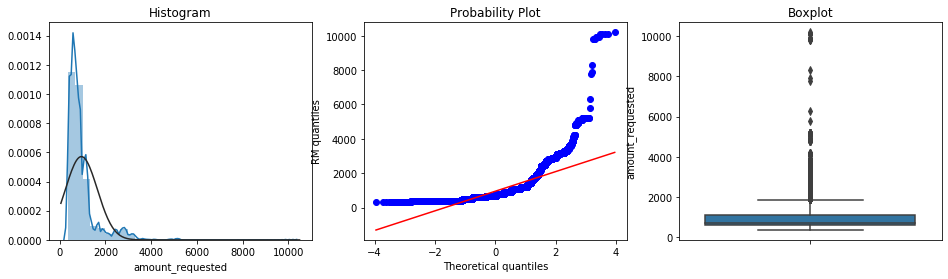

 7 . risk_score  ( Correlation : 0.0861 )


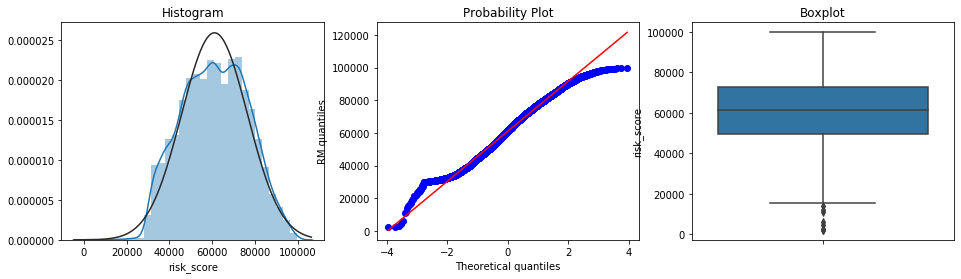

 8 . risk_score_2  ( Correlation : 0.0105 )


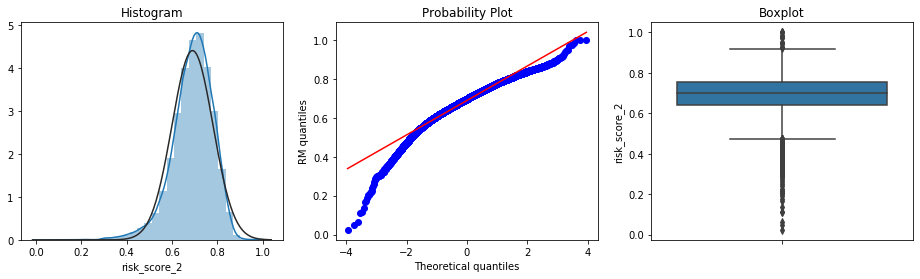

 9 . risk_score_3  ( Correlation : -0.0375 )


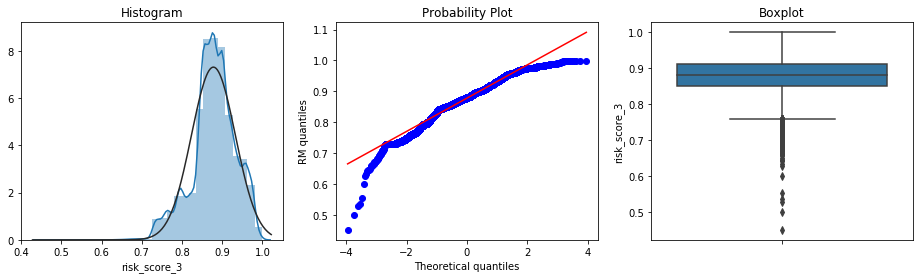

 10 . risk_score_4  ( Correlation : 0.0061 )


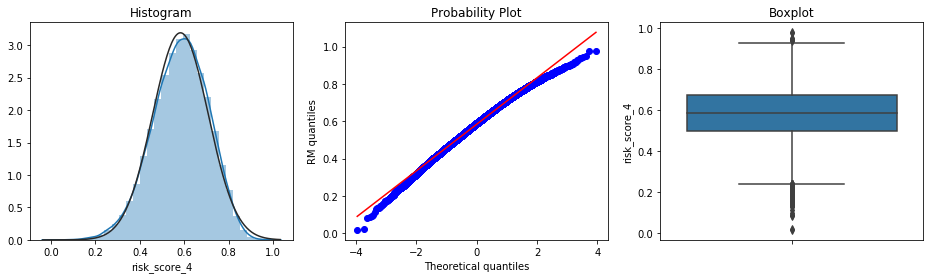

 11 . risk_score_5  ( Correlation : -0.0075 )


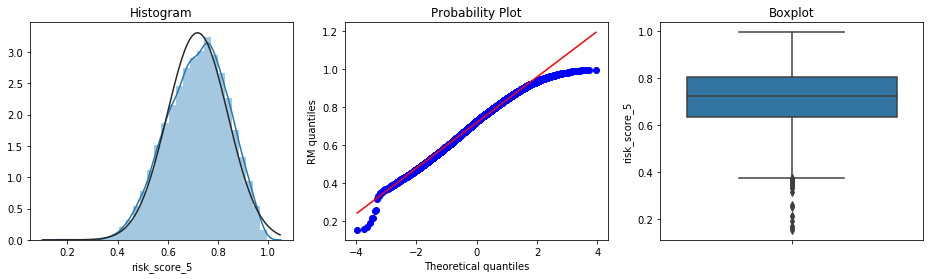

 12 . ext_quality_score  ( Correlation : -0.0321 )


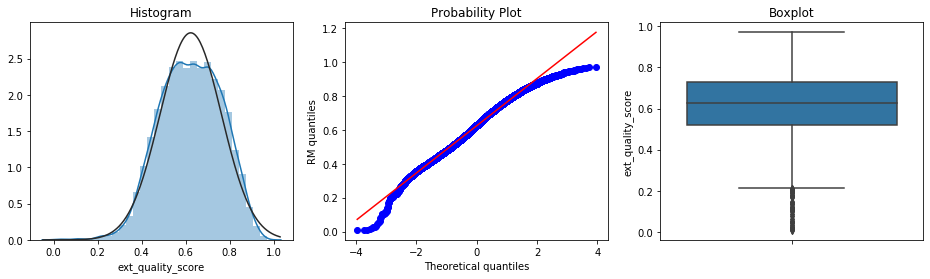

 13 . ext_quality_score_2  ( Correlation : -0.0243 )


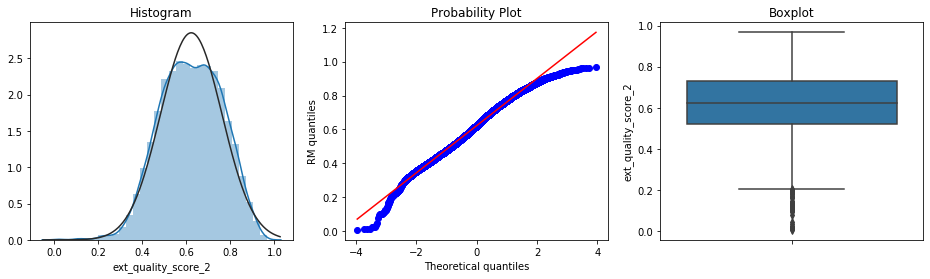

 14 . inquiries_last_month  ( Correlation : -0.0252 )


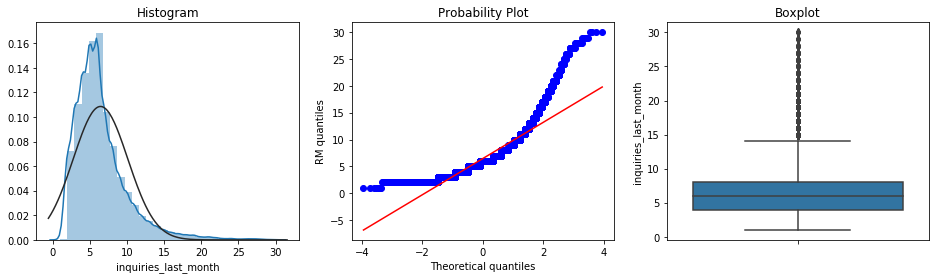

 15 . e_signed  ( Correlation : 1.0 )


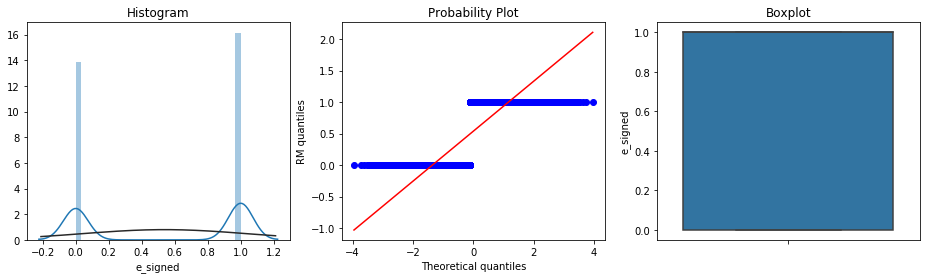

 16 . personal_account_months  ( Correlation : -0.0321 )


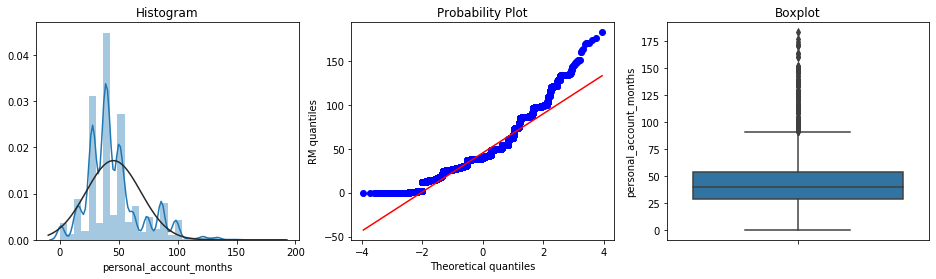

 17 . employment_months  ( Correlation : 0.0042 )


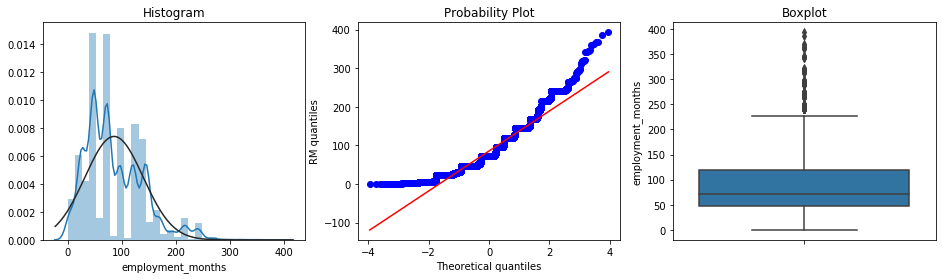

In [27]:
NumericalDistribution(data, num_feature,target)

> ### 3.4 Encoding

In [30]:
response = data['e_signed']
identifier = data['entry_id']

del data['e_signed']
del data['entry_id']

In [33]:
data_KOneHot = data.copy()
data_Km1OneHot = data.copy()

In [34]:
data_KOneHot = pd.get_dummies(data)

In [35]:
data_Km1OneHot = pd.get_dummies(data,drop_first=True)

In [37]:
from feature_engine.categorical_encoders import MeanCategoricalEncoder,OrdinalCategoricalEncoder

In [39]:
mean_cat_encoder = MeanCategoricalEncoder(variables=['pay_schedule'])
ordinal_cat_encoder = OrdinalCategoricalEncoder(variables=['pay_schedule'])

In [42]:
data_MeanEncoded = mean_cat_encoder.fit_transform(data,response)

In [44]:
data_ordinal_encoded = ordinal_cat_encoder.fit_transform(data,response)

4 versions of data:
1. data_KOneHot
2. data_Km1OneHot
3. data_MeanEncoded
4. data_ordinal_encoded

> ### 3.4 Scaling

In [28]:
from sklearn.preprocessing import StandardScaler,RobustScaler
ss = StandardScaler()
rs = RobustScaler()


In [49]:
column_list = data_KOneHot.columns
data_KOneHot_ss = pd.DataFrame(ss.fit_transform(data_KOneHot),columns=column_list)
data_KOneHot_rs = pd.DataFrame(rs.fit_transform(data_KOneHot),columns=column_list)


In [50]:
column_list = data_Km1OneHot.columns
data_Km1OneHot_ss = pd.DataFrame(ss.fit_transform(data_Km1OneHot),columns=column_list)
data_Km1OneHot_rs = pd.DataFrame(rs.fit_transform(data_Km1OneHot),columns=column_list)

In [51]:
column_list = data_MeanEncoded.columns
data_MeanEncoded_ss = pd.DataFrame(ss.fit_transform(data_MeanEncoded),columns=column_list)
data_MeanEncoded_rs = pd.DataFrame(rs.fit_transform(data_MeanEncoded),columns=column_list)

In [52]:
column_list = data_ordinal_encoded.columns
data_ordinal_encoded_ss = pd.DataFrame(ss.fit_transform(data_ordinal_encoded),columns=column_list)
data_ordinal_encoded_rs = pd.DataFrame(rs.fit_transform(data_ordinal_encoded),columns=column_list)

* Scaled Data Frames

[data_KOneHot_ss,data_KOneHot_rs,data_Km1OneHot_ss,data_Km1OneHot_rs,data_MeanEncoded_ss,data_MeanEncoded_rs,data_ordinal_encoded_ss,data_ordinal_encoded_rs]

* Normal Data Frames

[data_KOneHot,data_Km1OneHot,data_MeanEncoded,data_ordinal_encoded]

> ### 3.8 Feature Selection

> ### 3.9 Data Discovery

# 04. Evaluate Algorithms

In [87]:
# Linear
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,RidgeClassifierCV,SGDClassifier,Perceptron

# Non Linear
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

# Tree
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

# Ensemble
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix,classification_report

> ### 4.1 Linear Models

In [54]:
algo_list = []

algo_list.append(('LogisticRegression',LogisticRegression()))
algo_list.append(('PassiveAggressiveClassifier',PassiveAggressiveClassifier()))
algo_list.append(('RidgeClassifierCV',RidgeClassifierCV()))
algo_list.append(('SGDClassifier',SGDClassifier()))
algo_list.append(('Perceptron',Perceptron()))

>> #### 4.1.1 Scaled Models

In [64]:
scaled_data = [data_KOneHot_ss,data_KOneHot_rs,data_Km1OneHot_ss,data_Km1OneHot_rs,data_MeanEncoded_ss,
               data_MeanEncoded_rs,data_ordinal_encoded_ss,data_ordinal_encoded_rs]


In [69]:
# Naming Data Frames
data_KOneHot.name = 'data_KOneHot'
data_KOneHot_ss.name = 'data_KOneHot_ss'
data_KOneHot_rs.name = 'data_KOneHot_rs'

data_Km1OneHot.name = 'data_Km1OneHot'
data_Km1OneHot_ss.name = 'data_Km1OneHot_ss'
data_Km1OneHot_rs.name = 'data_Km1OneHot_rs'

data_MeanEncoded.name = 'data_MeanEncoded'
data_MeanEncoded_ss.name = 'data_MeanEncoded_ss'
data_MeanEncoded_rs.name = 'data_MeanEncoded_rs'

data_ordinal_encoded.name = 'data_ordinal_encoded'
data_ordinal_encoded_ss.name = 'data_ordinal_encoded_ss'
data_ordinal_encoded_rs.name = 'data_ordinal_encoded_rs'

In [79]:
# evaluate each model in turn 
scoring = 'accuracy'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in scaled_data:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)

In [80]:
results.sort_values(by=['Metric','std'],ascending=False)

,DataFrame,ModelName,Metric,std
5,data_KOneHot_rs,LogisticRegression,0.573990,0.006061
10,data_Km1OneHot_ss,LogisticRegression,0.573990,0.006061
15,data_Km1OneHot_rs,LogisticRegression,0.573990,0.005926
0,data_KOneHot_ss,LogisticRegression,0.573934,0.006000
22,data_MeanEncoded_ss,RidgeClassifierCV,0.573766,0.005477
27,data_MeanEncoded_rs,RidgeClassifierCV,0.573766,0.005341
2,data_KOneHot_ss,RidgeClassifierCV,0.573599,0.005643
7,data_KOneHot_rs,RidgeClassifierCV,0.573599,0.005508
12,data_Km1OneHot_ss,RidgeClassifierCV,0.573599,0.005508
17,data_Km1OneHot_rs,RidgeClassifierCV,0.573599,0.005477


>> #### 4.1.2 Non-Scaled Models

In [81]:
unscaled = [data_Km1OneHot,data_KOneHot,data_MeanEncoded,data_ordinal_encoded]

In [82]:
# evaluate each model in turn 
scoring = 'accuracy'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in unscaled:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)

In [83]:
results

,DataFrame,ModelName,Metric,std
0,data_Km1OneHot,LogisticRegression,0.567624,0.005890
1,data_Km1OneHot,PassiveAggressiveClassifier,0.488889,0.036711
2,data_Km1OneHot,RidgeClassifierCV,0.573096,0.006565
3,data_Km1OneHot,SGDClassifier,0.483528,0.037220
4,data_Km1OneHot,Perceptron,0.512954,0.035993
5,data_KOneHot,LogisticRegression,0.567512,0.006884
6,data_KOneHot,PassiveAggressiveClassifier,0.461749,0.001854
7,data_KOneHot,RidgeClassifierCV,0.573543,0.006614
8,data_KOneHot,SGDClassifier,0.506978,0.031470
9,data_KOneHot,Perceptron,0.512954,0.035993


**Logistic Regression on a km1OneHot + scaled is working better** Accuracy = 0.573990

> ### 4.2 Non-Linear Models

In [85]:
algo_list = []

algo_list.append(('KNeighborsClassifier',KNeighborsClassifier()))
#algo_list.append(('SVC',SVC()))
#algo_list.append(('NuSVC',NuSVC()))
algo_list.append(('GaussianNB',GaussianNB()))
algo_list.append(('BernoulliNB',BernoulliNB()))
algo_list.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))
algo_list.append(('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis()))

>> #### 4.2.1 Scaled Models

In [86]:
# evaluate each model in turn 
scoring = 'accuracy'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in scaled_data:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)

In [89]:
results.sort_values(by=['Metric','std'],ascending=False)

,DataFrame,ModelName,Metric,std
34,data_ordinal_encoded_ss,QuadraticDiscriminantAnalysis,0.595545,0.010154
39,data_ordinal_encoded_rs,QuadraticDiscriminantAnalysis,0.595545,0.010154
14,data_Km1OneHot_ss,QuadraticDiscriminantAnalysis,0.592808,0.007029
19,data_Km1OneHot_rs,QuadraticDiscriminantAnalysis,0.592808,0.007029
24,data_MeanEncoded_ss,QuadraticDiscriminantAnalysis,0.592585,0.009132
29,data_MeanEncoded_rs,QuadraticDiscriminantAnalysis,0.592585,0.009132
31,data_ordinal_encoded_ss,GaussianNB,0.574437,0.010450
36,data_ordinal_encoded_rs,GaussianNB,0.574437,0.010450
3,data_KOneHot_ss,LinearDiscriminantAnalysis,0.573878,0.005767
8,data_KOneHot_rs,LinearDiscriminantAnalysis,0.573878,0.005767


>> #### 4.2.2 Non-Scaled Models

In [90]:
# evaluate each model in turn 
scoring = 'accuracy'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in unscaled:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)
results.sort_values(by=['Metric','std'],ascending=False)

,DataFrame,ModelName,Metric,std
19,data_ordinal_encoded,QuadraticDiscriminantAnalysis,0.595545,0.010154
4,data_Km1OneHot,QuadraticDiscriminantAnalysis,0.592808,0.007029
14,data_MeanEncoded,QuadraticDiscriminantAnalysis,0.592585,0.009132
3,data_Km1OneHot,LinearDiscriminantAnalysis,0.573878,0.005767
8,data_KOneHot,LinearDiscriminantAnalysis,0.573878,0.005767
18,data_ordinal_encoded,LinearDiscriminantAnalysis,0.573599,0.005336
13,data_MeanEncoded,LinearDiscriminantAnalysis,0.573431,0.005643
6,data_KOneHot,GaussianNB,0.571533,0.009861
16,data_ordinal_encoded,GaussianNB,0.571030,0.009725
1,data_Km1OneHot,GaussianNB,0.570528,0.010785


**QuadraticDiscriminantAnalysis on a OrdinalEncoding + scaling is working better** Accuracy = 0.595545

> ### 4.3 Tree Models

In [92]:
algo_list = []

algo_list.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
algo_list.append(('ExtraTreeClassifier',ExtraTreeClassifier()))

>> #### 4.3.1 Scaled Models

In [93]:
# evaluate each model in turn 
scoring = 'accuracy'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in scaled_data:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)

In [94]:
results.sort_values(by=['Metric','std'],ascending=False)

,DataFrame,ModelName,Metric,std
4,data_Km1OneHot_ss,DecisionTreeClassifier,0.574380,0.001554
12,data_ordinal_encoded_ss,DecisionTreeClassifier,0.574324,0.004078
14,data_ordinal_encoded_rs,DecisionTreeClassifier,0.574324,0.003942
2,data_KOneHot_rs,DecisionTreeClassifier,0.573878,0.004177
0,data_KOneHot_ss,DecisionTreeClassifier,0.573543,0.002879
8,data_MeanEncoded_ss,DecisionTreeClassifier,0.573487,0.001459
10,data_MeanEncoded_rs,DecisionTreeClassifier,0.572817,0.002415
6,data_Km1OneHot_rs,DecisionTreeClassifier,0.569913,0.004556
15,data_ordinal_encoded_rs,ExtraTreeClassifier,0.543165,0.002793
1,data_KOneHot_ss,ExtraTreeClassifier,0.538698,0.005135


>> #### 4.3.2 Non-Scaled Models

In [95]:
# evaluate each model in turn 
scoring = 'accuracy'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in unscaled:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)
results.sort_values(by=['Metric','std'],ascending=False)

,DataFrame,ModelName,Metric,std
4,data_MeanEncoded,DecisionTreeClassifier,0.573487,0.003782
2,data_KOneHot,DecisionTreeClassifier,0.573487,0.001676
6,data_ordinal_encoded,DecisionTreeClassifier,0.572314,0.003304
0,data_Km1OneHot,DecisionTreeClassifier,0.571924,0.005536
1,data_Km1OneHot,ExtraTreeClassifier,0.540317,0.006877
5,data_MeanEncoded,ExtraTreeClassifier,0.539368,0.001988
7,data_ordinal_encoded,ExtraTreeClassifier,0.536520,0.002321
3,data_KOneHot,ExtraTreeClassifier,0.531718,0.006963


Our **QuadraticDiscriminantAnalysis on a OrdinalEncoding + scaling is working better** Accuracy = 0.595545

> ### 4.4 Ensemble

In [96]:
algo_list = []

algo_list.append(('RandomForestClassifier',RandomForestClassifier()))
algo_list.append(('AdaBoostClassifier',AdaBoostClassifier()))
algo_list.append(('BaggingClassifier',BaggingClassifier()))
algo_list.append(('ExtraTreesClassifier',ExtraTreesClassifier()))
algo_list.append(('GradientBoostingClassifier',GradientBoostingClassifier()))

In [97]:
# evaluate each model in turn 
scoring = 'accuracy'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in scaled_data:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)
        print(i.name,'+',name,'->Done')
results.sort_values(by=['Metric','std'],ascending=False)

,DataFrame,ModelName,Metric,std
34,data_ordinal_encoded_ss,GradientBoostingClassifier,0.635415,0.004847
24,data_MeanEncoded_ss,GradientBoostingClassifier,0.635191,0.004758
14,data_Km1OneHot_ss,GradientBoostingClassifier,0.635191,0.002721
19,data_Km1OneHot_rs,GradientBoostingClassifier,0.635135,0.002644
39,data_ordinal_encoded_rs,GradientBoostingClassifier,0.635080,0.004944
4,data_KOneHot_ss,GradientBoostingClassifier,0.634912,0.004368
29,data_MeanEncoded_rs,GradientBoostingClassifier,0.634856,0.005481
9,data_KOneHot_rs,GradientBoostingClassifier,0.634856,0.004469
0,data_KOneHot_ss,RandomForestClassifier,0.627653,0.004695
30,data_ordinal_encoded_ss,RandomForestClassifier,0.627486,0.007959


Our **GradientBoostingClassifier on a OrdinalEncoding + StandardScaling is working better** Accuracy = 0.635415

### f1 score

In [99]:
# evaluate each model in turn 
scoring = 'f1'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in scaled_data:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)
        print(i.name,'+',name,'->Done')
results.sort_values(by=['Metric','std'],ascending=False)

data_KOneHot_ss + RandomForestClassifier ->Done
data_KOneHot_ss + AdaBoostClassifier ->Done
data_KOneHot_ss + BaggingClassifier ->Done
data_KOneHot_ss + ExtraTreesClassifier ->Done
data_KOneHot_ss + GradientBoostingClassifier ->Done
data_KOneHot_rs + RandomForestClassifier ->Done
data_KOneHot_rs + AdaBoostClassifier ->Done
data_KOneHot_rs + BaggingClassifier ->Done
data_KOneHot_rs + ExtraTreesClassifier ->Done
data_KOneHot_rs + GradientBoostingClassifier ->Done
data_Km1OneHot_ss + RandomForestClassifier ->Done
data_Km1OneHot_ss + AdaBoostClassifier ->Done
data_Km1OneHot_ss + BaggingClassifier ->Done
data_Km1OneHot_ss + ExtraTreesClassifier ->Done
data_Km1OneHot_ss + GradientBoostingClassifier ->Done
data_Km1OneHot_rs + RandomForestClassifier ->Done
data_Km1OneHot_rs + AdaBoostClassifier ->Done
data_Km1OneHot_rs + BaggingClassifier ->Done
data_Km1OneHot_rs + ExtraTreesClassifier ->Done
data_Km1OneHot_rs + GradientBoostingClassifier ->Done
data_MeanEncoded_ss + RandomForestClassifier ->D

,DataFrame,ModelName,Metric,std
19,data_Km1OneHot_rs,GradientBoostingClassifier,0.679742,0.002049
24,data_MeanEncoded_ss,GradientBoostingClassifier,0.679489,0.003116
29,data_MeanEncoded_rs,GradientBoostingClassifier,0.679327,0.003317
34,data_ordinal_encoded_ss,GradientBoostingClassifier,0.678715,0.003810
4,data_KOneHot_ss,GradientBoostingClassifier,0.678659,0.003285
39,data_ordinal_encoded_rs,GradientBoostingClassifier,0.678588,0.004199
9,data_KOneHot_rs,GradientBoostingClassifier,0.678332,0.003321
14,data_Km1OneHot_ss,GradientBoostingClassifier,0.677902,0.003648
0,data_KOneHot_ss,RandomForestClassifier,0.662907,0.005465
35,data_ordinal_encoded_rs,RandomForestClassifier,0.661735,0.002047


In [98]:
# evaluate each model in turn 
scoring = 'accuracy'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in unscaled:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)
results.sort_values(by=['Metric','std'],ascending=False)

,DataFrame,ModelName,Metric,std
14,data_MeanEncoded,GradientBoostingClassifier,0.635471,0.004736
19,data_ordinal_encoded,GradientBoostingClassifier,0.635359,0.004758
9,data_KOneHot,GradientBoostingClassifier,0.634745,0.004289
4,data_Km1OneHot,GradientBoostingClassifier,0.633349,0.004712
10,data_MeanEncoded,RandomForestClassifier,0.626536,0.005647
15,data_ordinal_encoded,RandomForestClassifier,0.625475,0.008045
5,data_KOneHot,RandomForestClassifier,0.621846,0.008890
0,data_Km1OneHot,RandomForestClassifier,0.620617,0.008437
18,data_ordinal_encoded,ExtraTreesClassifier,0.617267,0.007918
3,data_Km1OneHot,ExtraTreesClassifier,0.616261,0.005711


### f1 score

In [100]:
# evaluate each model in turn 
scoring = 'f1'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in unscaled:
    for name, model in algo_list:
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)
        print(i.name,'+',name,'->Done')
results.sort_values(by=['Metric','std'],ascending=False)

data_Km1OneHot + RandomForestClassifier ->Done
data_Km1OneHot + AdaBoostClassifier ->Done
data_Km1OneHot + BaggingClassifier ->Done
data_Km1OneHot + ExtraTreesClassifier ->Done
data_Km1OneHot + GradientBoostingClassifier ->Done
data_KOneHot + RandomForestClassifier ->Done
data_KOneHot + AdaBoostClassifier ->Done
data_KOneHot + BaggingClassifier ->Done
data_KOneHot + ExtraTreesClassifier ->Done
data_KOneHot + GradientBoostingClassifier ->Done
data_MeanEncoded + RandomForestClassifier ->Done
data_MeanEncoded + AdaBoostClassifier ->Done
data_MeanEncoded + BaggingClassifier ->Done
data_MeanEncoded + ExtraTreesClassifier ->Done
data_MeanEncoded + GradientBoostingClassifier ->Done
data_ordinal_encoded + RandomForestClassifier ->Done
data_ordinal_encoded + AdaBoostClassifier ->Done
data_ordinal_encoded + BaggingClassifier ->Done
data_ordinal_encoded + ExtraTreesClassifier ->Done
data_ordinal_encoded + GradientBoostingClassifier ->Done


,DataFrame,ModelName,Metric,std
4,data_Km1OneHot,GradientBoostingClassifier,0.679873,0.001851
14,data_MeanEncoded,GradientBoostingClassifier,0.679459,0.003144
19,data_ordinal_encoded,GradientBoostingClassifier,0.678681,0.003809
9,data_KOneHot,GradientBoostingClassifier,0.678463,0.003102
8,data_KOneHot,ExtraTreesClassifier,0.659428,0.006731
15,data_ordinal_encoded,RandomForestClassifier,0.658191,0.002351
18,data_ordinal_encoded,ExtraTreesClassifier,0.657954,0.005854
13,data_MeanEncoded,ExtraTreesClassifier,0.657743,0.003945
3,data_Km1OneHot,ExtraTreesClassifier,0.657485,0.005549
10,data_MeanEncoded,RandomForestClassifier,0.656576,0.006404


#### Conclusion : 
If i have to choose an algorithm to carry it for production, i will choose **GradientBoostingClassifier + data_MeanEncoded**

>> #### 4.4.1 Hard and Soft Voting

In [101]:
# Selecting only those algo that yield high accuracy
voter = VotingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier()),
                                     ('GradientBoostingClassifier', GradientBoostingClassifier()),
                                     ('ExtraTreesClassifier', ExtraTreesClassifier())
                                    ],voting='hard')

In [102]:
# Hard Voting
# evaluate each model in turn 
scoring = 'f1'
results = pd.DataFrame(columns=['DataFrame','ModelName','Metric','std'])

for i in scaled_data:
    for name, model in zip(['RandomForestClassifier', 'GradientBoostingClassifier', 'ExtraTreesClassifier', 'HardVoting'],
                       [RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), voter]):
        kfold = KFold(n_splits=3, random_state=10)
        cv_results = cross_val_score(model, i, response, cv=kfold, scoring=scoring)
        results = results.append({'DataFrame':i.name,'ModelName':name,'Metric':cv_results.mean(),'std':cv_results.std()},ignore_index=True)
results.sort_values(by=['Metric','std'],ascending=False)

,DataFrame,ModelName,f1,std,Metric
9,data_Km1OneHot_ss,GradientBoostingClassifier,NaN,0.001966,0.679840
29,data_ordinal_encoded_rs,GradientBoostingClassifier,NaN,0.003195,0.679391
21,data_MeanEncoded_rs,GradientBoostingClassifier,NaN,0.003266,0.679360
25,data_ordinal_encoded_ss,GradientBoostingClassifier,NaN,0.003971,0.678845
17,data_MeanEncoded_ss,GradientBoostingClassifier,NaN,0.003888,0.678813
5,data_KOneHot_rs,GradientBoostingClassifier,NaN,0.003384,0.678657
1,data_KOneHot_ss,GradientBoostingClassifier,NaN,0.003278,0.678232
13,data_Km1OneHot_rs,GradientBoostingClassifier,NaN,0.003765,0.677867
15,data_Km1OneHot_rs,HardVoting,NaN,0.003627,0.673639
3,data_KOneHot_ss,HardVoting,NaN,0.005502,0.672120


# 05. Finalize Model

In [108]:
classifier = GradientBoostingClassifier()

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_MeanEncoded,response,test_size=0.2,random_state=0)

In [112]:
classifier.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [113]:
ypred = classifier.predict(x_test)

In [114]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1654
           1       0.64      0.71      0.67      1928

    accuracy                           0.63      3582
   macro avg       0.63      0.62      0.62      3582
weighted avg       0.63      0.63      0.63      3582



# Conclusion:
Our main focus here was predicting those users that are most likely to enroll into e-signing loan page and with our model, we are able to achieve 71% customer of all customer that are enrolling from given data. This is good achievement however it is just accuracy of over all 63% and with this, there is still a better chance we can improve our model.